<a href="https://colab.research.google.com/github/datasett/nav_opendata/blob/master/packages/arbeidsforhold/etl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import sys

if 'dataverk' not in  sys.modules:
    !pip install dataverk

In [2]:
if 'google.colab' in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

In [3]:
import dataverk as dv
import numpy as np
import pandas as pd
import ipywidgets as widgets

import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as plio

# Get data

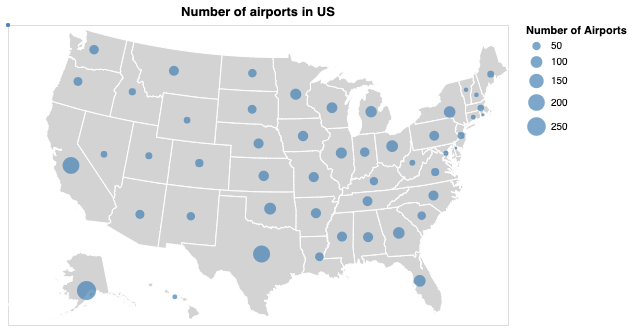

In [6]:
import altair as alt
alt.renderers.enable('notebook')
alt.themes.enable('opaque')
from vega_datasets import data

airports = data.airports.url
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# airport positions on background
points = alt.Chart(airports).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='count()',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Number of Airports'),
    color=alt.value('steelblue'),
    tooltip=['state:N','count:Q']
).properties(
    title='Number of airports in US'
)

background + points

In [7]:
from pprint import pprint
pprint(points.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json',
 'config': {'background': 'white',
            'mark': {'tooltip': None},
            'view': {'height': 300, 'width': 400}},
 'data': {'url': 'https://vega.github.io/vega-datasets/data/airports.csv'},
 'encoding': {'color': {'value': 'steelblue'},
              'latitude': {'field': 'latitude', 'type': 'quantitative'},
              'longitude': {'field': 'longitude', 'type': 'quantitative'},
              'size': {'field': 'count',
                       'title': 'Number of Airports',
                       'type': 'quantitative'},
              'tooltip': [{'field': 'state', 'type': 'nominal'},
                          {'field': 'count', 'type': 'quantitative'}]},
 'mark': 'circle',
 'title': 'Number of airports in US',
 'transform': [{'aggregate': [{'as': 'latitude',
                               'field': 'latitude',
                               'op': 'mean'},
                              {'as': 'longitude',
  

In [ ]:
print(data.us_10m.url)

# Datapackage

In [ ]:
dp = dv.Datapackage(metadata)

In [ ]:
description = '''
Airports

'''

dp.add_view(
    spec_type='altair',
    name='Airports',
    title='Airports',
    description = description,
    resources=[],
    attribution = "Kilde: NAV.",
    spec=points.to_dict()
)

In [ ]:
client = dv.Client()
client.publish(dp)